# 1. 1D with edge
## 1.1. Free boundary
### 1.1.1. without coriolis

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



def calc_F(r: int, k: int, m: int, N: int):
    F = np.array([[0., 0.]] * N)
    xs = r[:, 0]
    ys = r[:, 1]
    # Spring
    for i, x in enumerate(xs):
        if i == 0:
            F[i][0] = k * (xs[i+1] - x)
        elif i == len(xs) - 1:
            F[i][0] = k * (xs[i-1] - x)
        else:
            F[i][0] = k * (xs[i-1] - x) + k * (xs[i+1] - x)
    # Spring, transverse
    for i, y in enumerate(ys):
        if i == 0:
            F[i][1] = k * (ys[i+1] - y)
        elif i == len(xs) - 1:
            F[i][1] = k * (ys[i-1] - y)
        else:
            F[i][1] = k * (ys[i-1] - y) + k * (ys[i+1] - y)
        F[i][1] *= 0.1
    return F



N = 10 # number of mass
k = 1. # N/m
m = 1. # kg


r = np.array([[0., 0.]] * N) # m
v = np.array([[0., 0.]] * N) # m/s
v_ = np.array([[0., 0.]] * N) # m/s previous velocity
a_ = np.array([[0., 0.]] * N) # m/s previous velocity
F = np.array([[0., 0.]] * N)
# F[N//2-1][0] = 1. # Perturbation at the centor 
F[N//2-1][1] = 1. # Perturbation at the centor 


rs = [r.tolist()]
for _ in range(30):
    dt = 1.
    a = F / m
    v += a * dt
    r += v_ * dt
    rs.append(r.tolist())
    v_ = v
    a_ = a
    F = calc_F(r, k, m, N)
rs = np.array(rs)



for r in rs:
    plt.quiver(r[:, 0], r[:, 1], scale=1., units='xy')
    plt.show()



### 1.1.2. with Coriolis

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

mat = np.array([[0., 1.], [-1., 0.]])

def regulate_r(r):
    return np.clip(r, -1., 1.)

def calc_F(r, v, k: float, m: float, N: int, O: float):
    F = np.array([[0., 0.]] * N)
    xs = r[:, 0]
    ys = r[:, 1]
    # Spring
    for i, x in enumerate(xs):
        if i == 0:
            F[i][0] = k * (xs[i+1] - x)
        elif i == len(xs) - 1:
            F[i][0] = k * (xs[i-1] - x)
        else:
            F[i][0] = k * (xs[i-1] - x) + k * (xs[i+1] - x)
    # Spring, transverse
    for i, y in enumerate(ys):
        if i == 0:
            F[i][1] = k * (ys[i+1] - y)
        elif i == len(xs) - 1:
            F[i][1] = k * (ys[i-1] - y)
        else:
            F[i][1] = k * (ys[i-1] - y) + k * (ys[i+1] - y)
        F[i][1] *= 0.1
    # Coriolis
    for i, v_ in enumerate(v):
        F[i] += 2 * O * mat.dot(v_)
    return F



N = 24 # number of mass
k = 1. # N/m
m = 1. # kg
O = 0.6 # /s


r = np.array([[0., 0.]] * N) # m
v = np.array([[0., 0.]] * N) # m/s
v_ = np.array([[0., 0.]] * N) # m/s previous velocity
a_ = np.array([[0., 0.]] * N) # m/s previous velocity
F = np.array([[0., 0.]] * N)
F[N//2-1][1] = 500. # Perturbation at the centor 


rs = [r.tolist()]
vs = [v.tolist()]

dt = 0.01
T = 60
for t in range(int(T / dt)):
    a = F / m
    v += a_ * dt
    r += v_ * dt
    # r = regulate_r(r)
    if t % 100 == 0:
        rs.append(r.tolist())
        vs.append(v.tolist())

    v_ = v
    a_ = a
    F = calc_F(r, v, k, m, N, O)
rs = np.array(rs)
vs = np.array(vs)



for v in vs:
    plt.quiver(v[:, 0], v[:, 1], scale=1., units='xy')
    plt.show()



## 1.2. Fixed boundary
### 1.2.1. With coriolis

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

mat = np.array([[0., 1.], [-1., 0.]])

def regulate_r(r):
    return np.clip(r, -1., 1.)

def calc_F(r, v, k: float, m: float, N: int, O: float):
    F = np.array([[0., 0.]] * N)
    xs = r[:, 0]
    ys = r[:, 1]
    # Spring
    for i, x in enumerate(xs):
        if i == 0:
            F[i][0] = k * (xs[i+1] - x) + k * (-x)
        elif i == len(xs) - 1:
            F[i][0] = k * (xs[i-1] - x) + k * (-x)
        else:
            F[i][0] = k * (xs[i-1] - x) + k * (xs[i+1] - x)
    # Spring, transverse
    for i, y in enumerate(ys):
        if i == 0:
            F[i][1] = k * (ys[i+1] - y)+ k * (-y)
        elif i == len(xs) - 1:
            F[i][1] = k * (ys[i-1] - y)+ k * (-y)
        else:
            F[i][1] = k * (ys[i-1] - y) + k * (ys[i+1] - y)
        F[i][1] *= 0.1
    # Coriolis
    for i, v_ in enumerate(v):
        F[i] += 2 * O * mat.dot(v_)
    return F



N = 24 # number of mass
k = 1. # N/m
m = 1. # kg
O = 0.6 # /s


r = np.array([[0., 0.]] * N) # m
v = np.array([[0., 0.]] * N) # m/s
v_ = np.array([[0., 0.]] * N) # m/s previous velocity
a_ = np.array([[0., 0.]] * N) # m/s previous velocity
F = np.array([[0., 0.]] * N)
# F[N//2-1][1] = 500. # Perturbation at the centor 
r[N//2-1][1] = 5. # Perturbation at the centor 

rs = [r.tolist()]
vs = [v.tolist()]

dt = 0.01
interval = int(1 / 0.01)

T = 60
for t in range(int(T / dt)):
    a = F / m
    v += a_ * dt
    r += v_ * dt
    # r = regulate_r(r)
    if t % interval == 0:
        rs.append(r.tolist())
        vs.append(v.tolist())
    v_ = v
    a_ = a
    F = calc_F(r, v, k, m, N, O)
rs = np.array(rs)
vs = np.array(vs)



for v in vs:
    plt.quiver(v[:, 0], v[:, 1], scale=1., units='xy')
    plt.show()



# 2. 2D (Fixed boundary)

(9, 22, 2)
0.0  s


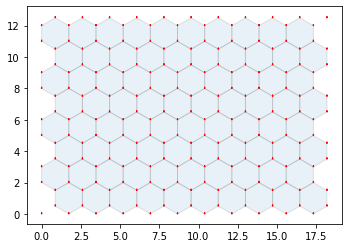

1.0  s


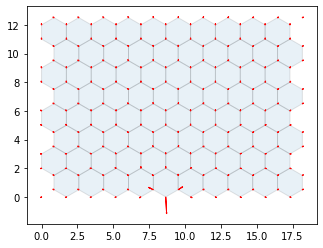

2.0  s


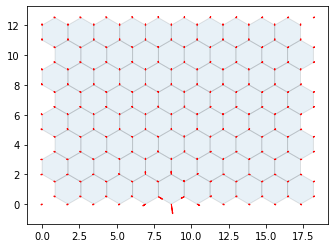

3.0  s


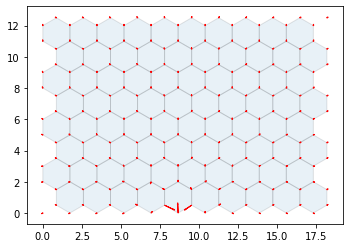

4.0  s


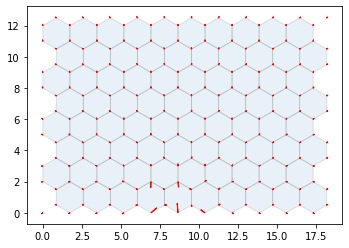

5.0  s


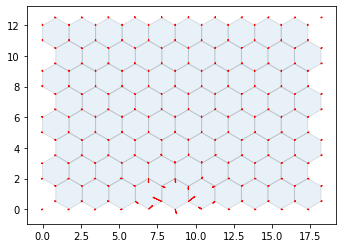

6.0  s


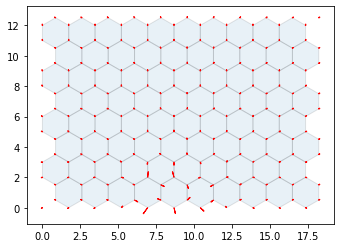

7.0  s


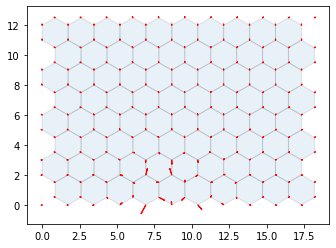

8.0  s


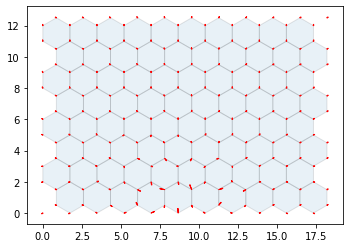

9.0  s


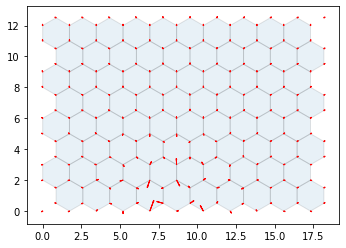

10.0  s


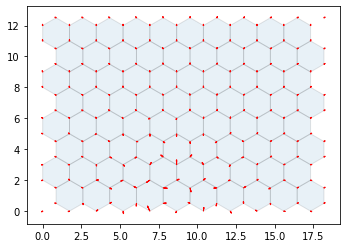

11.0  s


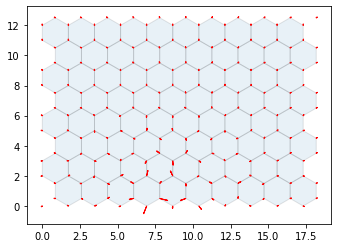

12.0  s


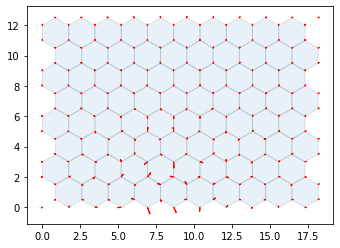

13.0  s


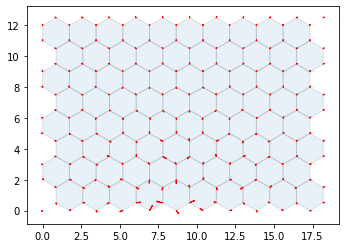

14.0  s


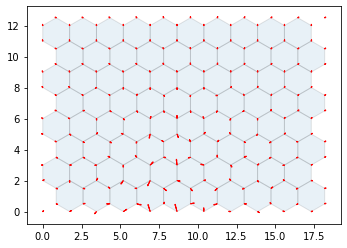

15.0  s


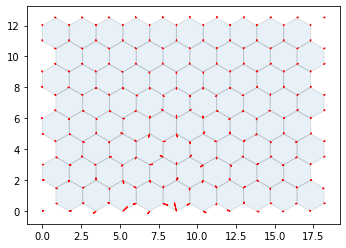

16.0  s


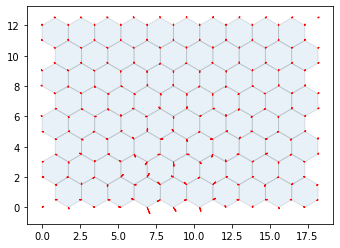

17.0  s


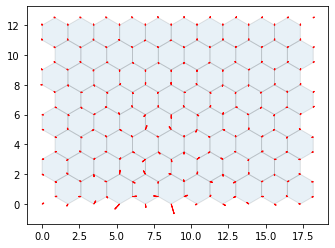

18.0  s


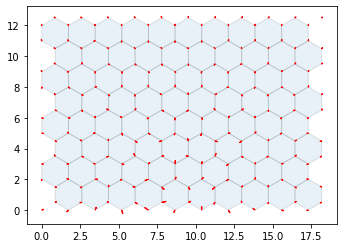

19.0  s


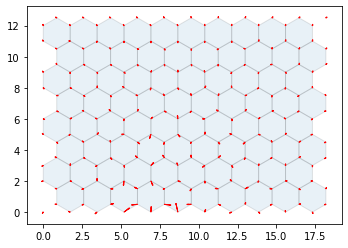

20.0  s


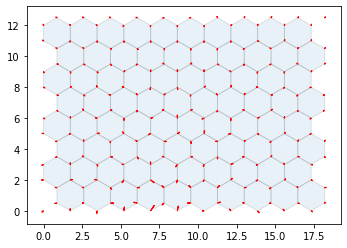

21.0  s


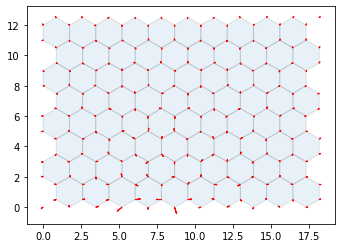

22.0  s


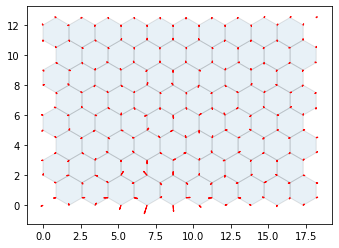

23.0  s


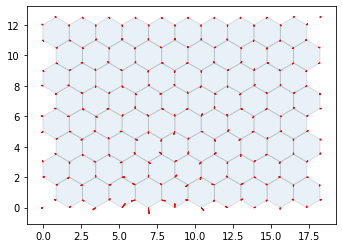

24.0  s


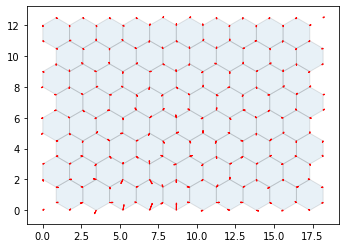

25.0  s


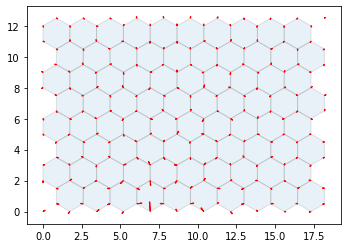

26.0  s


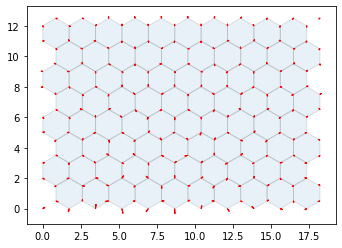

27.0  s


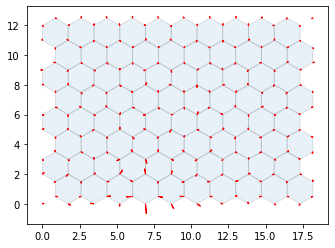

28.0  s


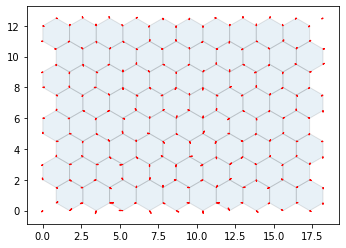

29.0  s


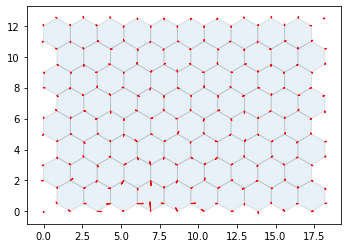

30.0  s


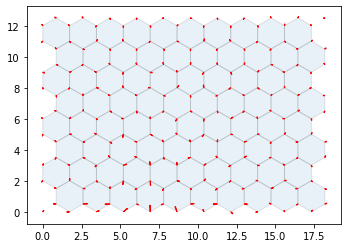

31.0  s


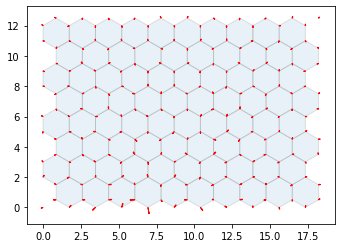

32.0  s


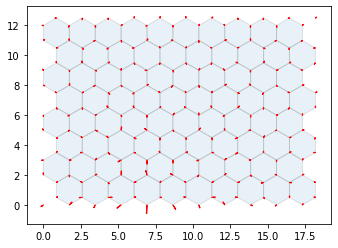

33.0  s


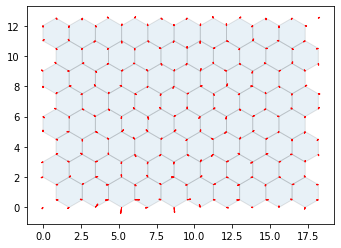

34.0  s


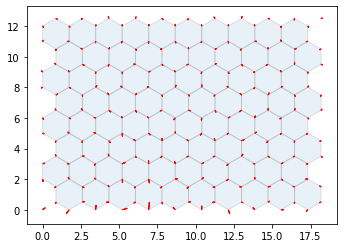

35.0  s


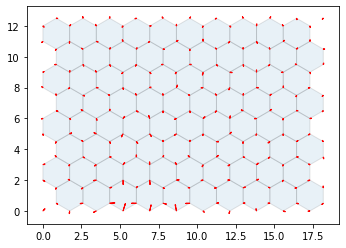

36.0  s


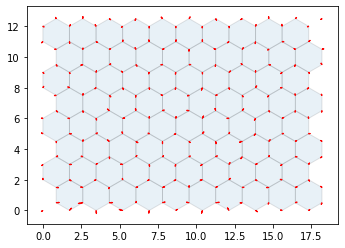

37.0  s


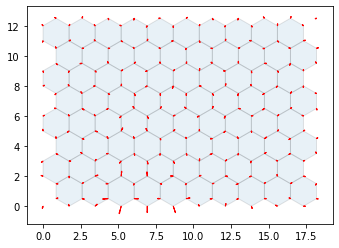

38.0  s


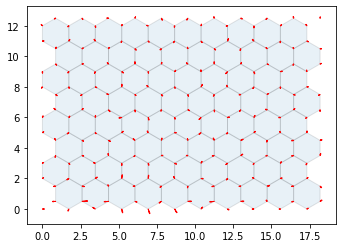

39.0  s


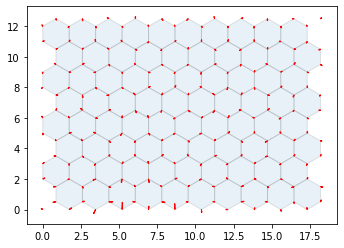

40.0  s


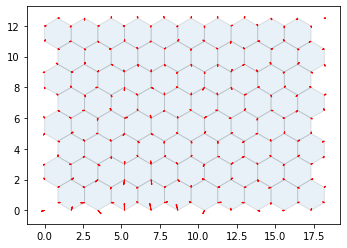

41.0  s


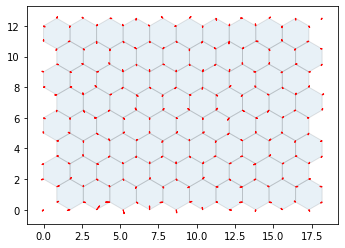

42.0  s


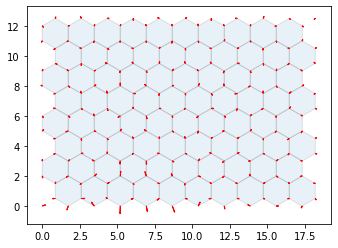

43.0  s


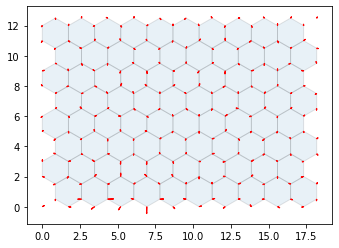

44.0  s


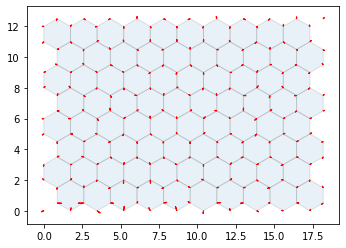

45.0  s


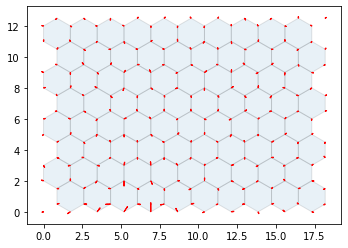

46.0  s


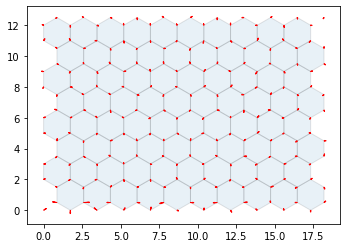

47.0  s


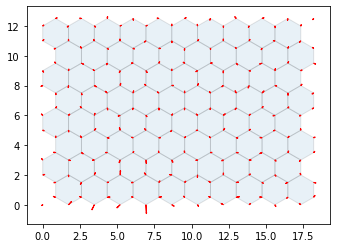

48.0  s


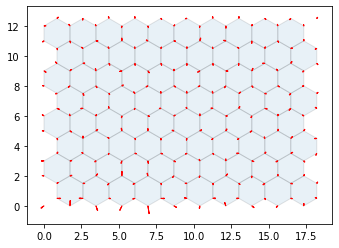

49.0  s


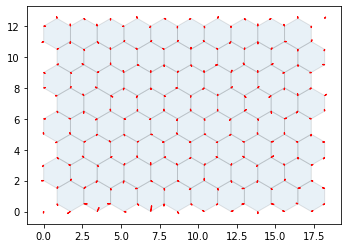

50.0  s


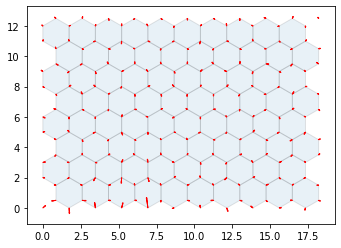

51.0  s


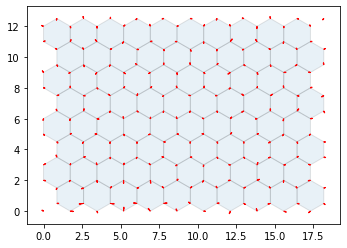

52.0  s


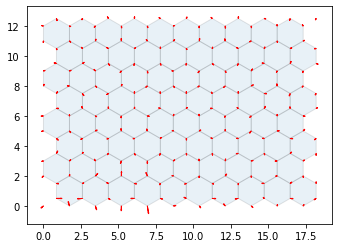

53.0  s


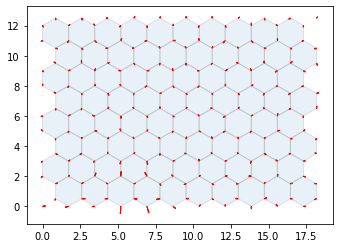

54.0  s


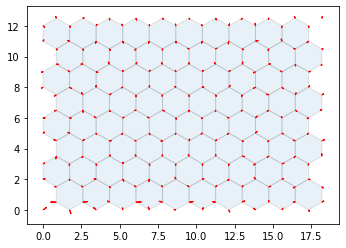

55.0  s


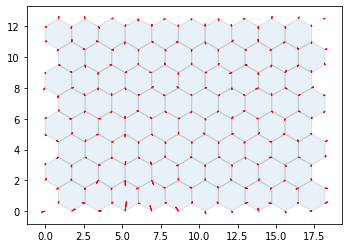

56.0  s


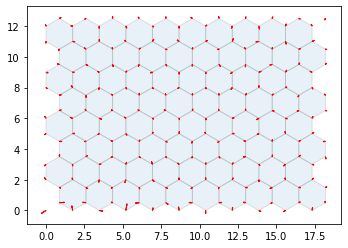

57.0  s


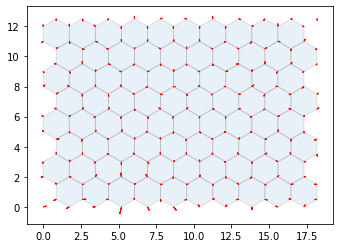

58.0  s


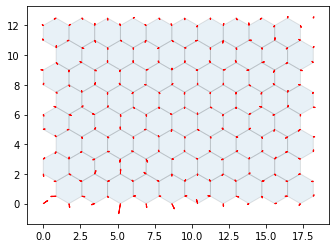

59.0  s


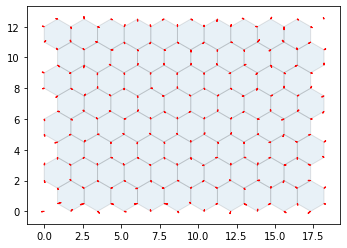

60.0  s


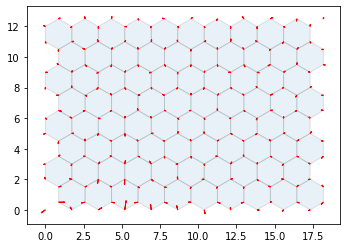

61.0  s


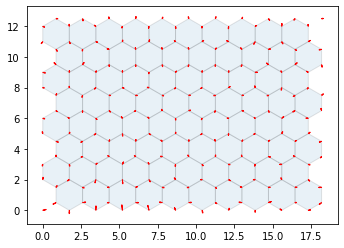

KeyboardInterrupt: 

In [114]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

def regulate_r(r):
    return np.clip(r, -1., 1.)
    
# Experimental setup
O = -0.05
M = 1. # g
C = 1. # N/m
w0 = np.sqrt(C / M)
a = 1. # distance between masses
x = np.array([[1.], [0.]]) # x hat
y = np.array([[0.], [1.]]) # y hat
a1 = np.sqrt(3) * a * x
a2 = (np.sqrt(3) * x + 3 * y) * a / 2.
R1 = 1 / 3 * (a1 + a2)
R2 = 1 / 3 * (-2 * a1 + a2)
R3 = 1 / 3 * (a1 - 2 * a2)
Rw = np.array([[0., -1.], [1., 0.]])
R1h = R1 / la.norm(R1)
R2h = R2 / la.norm(R2)
R3h = R3 / la.norm(R3)
R11 = R1h * R1h.conj().T
R22 = R2h * R2h.conj().T
R33 = R3h * R3h.conj().T
xmax = np.pi / np.sqrt(3) * 2

# Add transverse
oz = np.array([[0., -1.], [1., 0.]])
# Ct = 0.01
# R11 = R11 + Ct * oz.dot(R11)
# R22 = R22 + Ct * oz.dot(R22)
# R33 = R33 + Ct * oz.dot(R33)


mat = np.array([[0., 1.], [-1., 0.]])

def calc_F(rs, vs, k: float, m: float, Nx: int, Ny: int, O: float):
    F = np.array([[[0., 0.]] * Nx] * Ny)

    for y, rx in enumerate(rs):
        if y == 0:
            for x, r in enumerate(rx):
                if x == 0:
                    F[y, x] = k * (0 - r).dot(R33)
                    F[y, x] += k * (0 - r).dot(R22)
                    F[y, x] += k * (rs[y, x+1] - r).dot(R11)
                elif x == 21:
                    F[y, x] = k * (rs[y+1, x] - r).dot(R33)
                    F[y, x] += k * (rs[y, x-1] - r).dot(R11)
                    F[y, x] += k * (0 - r).dot(R22)
                elif x % 2 == 0:
                    F[y, x] = k * (0 - r).dot(R33)
                    F[y, x] += k * (rs[y, x-1] - r).dot(R22)
                    F[y, x] += k * (rs[y, x+1] - r).dot(R11)
                else:
                    F[y, x] = k * (rs[y+1, x] - r).dot(R33)
                    F[y, x] += k * (rs[y, x-1] - r).dot(R11)
                    F[y, x] += k * (rs[y, x+1] - r).dot(R22)
        elif y == 8:
            for x, r in enumerate(rx):
                if x == 0:
                    F[y, x] = k * (rs[y-1, x] - r).dot(R33)
                    F[y, x] += k * (0 - r).dot(R22)
                    F[y, x] += k * (rs[y, x+1] - r).dot(R11)
                elif x == 21:
                    F[y, x] = k * (0 - r).dot(R33)
                    F[y, x] += k * (rs[y, x-1] - r).dot(R11)
                    F[y, x] += k * (0 - r).dot(R22)
                elif x % 2 == 0:
                    F[y, x] = k * (rs[y-1, x] - r).dot(R33)
                    F[y, x] += k * (rs[y, x-1] - r).dot(R22)
                    F[y, x] += k * (rs[y, x+1] - r).dot(R11)
                else:
                    F[y, x] = k * (0 - r).dot(R33)
                    F[y, x] += k * (rs[y, x-1] - r).dot(R11)
                    F[y, x] += k * (rs[y, x+1] - r).dot(R22)
        elif y % 2 == 0:
            for x, r in enumerate(rx):
                if x == 0:
                    F[y, x] = k * (rs[y-1, x] - r).dot(R33)
                    F[y, x] += k * (0 - r).dot(R22)
                    F[y, x] += k * (rs[y, x+1] - r).dot(R11)
                elif x == 21:
                    F[y, x] = k * (rs[y+1, x] - r).dot(R33)
                    F[y, x] += k * (rs[y, x-1] - r).dot(R11)
                    F[y, x] += k * (0 - r).dot(R22)
                elif x % 2 == 0:
                    F[y, x] = k * (rs[y-1, x] - r).dot(R33)
                    F[y, x] += k * (rs[y, x-1] - r).dot(R22)
                    F[y, x] += k * (rs[y, x+1] - r).dot(R11)
                else:
                    F[y, x] = k * (rs[y+1, x] - r).dot(R33)
                    F[y, x] += k * (rs[y, x-1] - r).dot(R11)
                    F[y, x] += k * (rs[y, x+1] - r).dot(R22)
        else:
            for x, r in enumerate(rx):
                if x == 0:
                    F[y, x] = k * (rs[y+1, x] - r).dot(R33)
                    F[y, x] += k * (0 - r).dot(R11)
                    F[y, x] += k * (rs[y, x+1] - r).dot(R22)
                elif x == 21:
                    F[y, x] = k * (rs[y-1, x] - r).dot(R33)
                    F[y, x] += k * (rs[y, x-1] - r).dot(R22)
                    F[y, x] += k * (0 - r).dot(R11)
                elif x % 2 == 0:
                    F[y, x] = k * (rs[y+1, x] - r).dot(R33)
                    F[y, x] += k * (rs[y, x-1] - r).dot(R11)
                    F[y, x] += k * (rs[y, x+1] - r).dot(R22)
                else:
                    F[y, x] = k * (rs[y-1, x] - r).dot(R33)
                    F[y, x] += k * (rs[y, x-1] - r).dot(R22)
                    F[y, x] += k * (rs[y, x+1] - r).dot(R11)


    # Coriolis
    for y, vx in enumerate(vs):
        for x, v in enumerate(vx):
            F[y, x] += 2 * O * mat.dot(v)
    return F



Nx = 22 # number of mass
Ny = 9

r = np.array([[[0., 0.]] * Nx] * Ny) # m
v = np.array([[[0., 0.]] * Nx] * Ny) # m/s
v_ = np.array([[[0., 0.]] * Nx] * Ny) # m/s previous velocity
a_ = np.array([[[0., 0.]] * Nx] * Ny) # m/s previous velocity
F = np.array([[[0., 0.]] * Nx] * Ny)
# F[0, Nx // 2 - 1][1] = 100. # Perturbation at the centor 
print(np.array(r).shape)
r[0][Nx//2 - 1][1] = 1. # Perturbation 


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon
a1 = np.sqrt(3) * a * np.array([1, 0])
a2 = (np.sqrt(3) * np.array([1, 0]) + 3 * np.array([0, 1])) * a / 2.

dx = np.sqrt(3)
dy = 3
offCoord = [
    [dx * x + np.sqrt(3), dy * y + 1] for y in range(4) for x in range(10)
]
offCoord.extend([
    [dx * x + np.sqrt(3) / 2, dy * y + 2.5] for y in range(4) for x in range(10)
])

rs = [r.tolist()]
vs = [v.tolist()]

dt = 0.001
interval = int(1 / dt) * 1

T = 1000
for t in range(int(T / dt)):
    # w = 0.25
    # r[0][Nx//2 - 1][0] = 0.5 * np.sin(dt * t * w * (2 * np.pi)) # Perturbation 
    # # r[0][Nx//2 - 1][0] = 0
    # r[0][Nx//2 - 1][1] = 0.5 * np.cos(dt * t * w * (2 * np.pi)) # Perturbation 
    r += v_ * dt
    v += a_ * dt
    # r = regulate_r(r)
    # v = regulate_r(v)
    if t % interval == 0:
        rs.append(r.tolist())
        vs.append(v.tolist())
    v_ = v
    a_ = F / m
    F = calc_F(r, v, C, m, Nx, Ny, O)

    if t % interval == 0:
        print(t * dt, ' s')
        # Plot
        fig, ax = plt.subplots(1)
        ax.set_aspect('equal')

        for c in offCoord:
            hexagon = RegularPolygon((c[0], c[1]), numVertices=6, radius=a, alpha=0.1, edgecolor='k')
            ax.add_patch(hexagon)
        plt.autoscale(enable = True)


        def arrow(pos, vec):
            ax.arrow(pos[0], pos[1], vec[0], vec[1], head_width=0.05, head_length=0.1, fc='black', ec='red')

        for j in range(11):
            for power, i in enumerate(range(0, 9, 2)):
                xi = v[i, j*2]
                eta = v[i, j*2 + 1]
                arrow([0., 3 * power] + a1 * j, xi)
                arrow(np.squeeze(R1) + [0, 3 * power] + a1 * j, eta)
            for power, i in enumerate(range(1, 9, 2)):
                xi = v[i, j*2]
                eta = v[i, j*2 + 1]
                arrow(np.squeeze(R1) + [0, 1 + 3 * power] + a1 * j, xi)
                arrow([0., 3 * power + 2] + a1 * j, eta)

    # plt.axis('off')
    plt.show()
rs = np.array(rs)
vs = np.array(vs)

print(rs.shape)


